# __ADA Boost__
## Pipeline 1

In [2]:
# import required modules
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

# load dataset
adadata = pd.read_csv('pipeline1.csv', header=0)
adadata.head()

,AdministrativeSkew,Administrative_DurationSkew,InformationalSkew,Informational_DurationSkew,ProductRelatedSkew,ProductRelated_DurationSkew,BounceRatesSkew,ExitRatesSkew,PageValuesSkew,SpecialDay_0.0,...,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,SeasonBins_1,SeasonBins_2,SeasonBins_3,SeasonBins_4,RevenueEnc
0,-0.990128,-0.996659,-0.520831,-0.492257,-1.922123,-2.096783,1.503281,1.982547,-0.533268,1,...,0,0,1,1,0,1,0,0,0,0
1,-0.990128,-0.996659,-0.520831,-0.492257,-1.574524,-1.074189,-1.036838,1.569866,-0.533268,1,...,0,0,1,1,0,1,0,0,0,0
2,-0.990128,-0.996659,-0.520831,-0.492257,-1.922123,-2.096783,1.503281,1.982547,-0.533268,1,...,0,0,1,1,0,1,0,0,0,0
3,-0.990128,-0.996659,-0.520831,-0.492257,-1.574524,-1.875436,1.354717,1.832073,-0.533268,1,...,0,0,1,1,0,1,0,0,0,0
4,-0.990128,-0.996659,-0.520831,-0.492257,-0.442610,0.057515,1.002737,0.722460,-0.533268,1,...,0,0,1,0,1,1,0,0,0,0


### Split and Resample Data

In [3]:
adadata.columns.values

array(['AdministrativeSkew', 'Administrative_DurationSkew',
       'InformationalSkew', 'Informational_DurationSkew',
       'ProductRelatedSkew', 'ProductRelated_DurationSkew',
       'BounceRatesSkew', 'ExitRatesSkew', 'PageValuesSkew',
       'SpecialDay_0.0', 'SpecialDay_0.2', 'SpecialDay_0.4',
       'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Region_1', 'Region_2', 'Region_3',
       'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',


In [4]:
feature_cols = ['AdministrativeSkew', 'Administrative_DurationSkew',
       'InformationalSkew', 'Informational_DurationSkew',
       'ProductRelatedSkew', 'ProductRelated_DurationSkew',
       'BounceRatesSkew', 'ExitRatesSkew', 'PageValuesSkew',
       'SpecialDay_0.0', 'SpecialDay_0.2', 'SpecialDay_0.4',
       'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Region_1', 'Region_2', 'Region_3',
       'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
       'TrafficType_8', 'TrafficType_9', 'TrafficType_10',
       'TrafficType_11', 'TrafficType_12', 'TrafficType_13',
       'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19',
       'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True',
       'SeasonBins_1', 'SeasonBins_2', 'SeasonBins_3', 'SeasonBins_4']
X = adadata[feature_cols] # Features
y = adadata.RevenueEnc # Target variable

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=500) # 70% training and 30% test

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

ada = AdaBoostClassifier(random_state=500)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [7]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2491,  147],
       [ 191,  254]])

In [8]:
print("F1_Score:",metrics.f1_score(y_test, y_pred))
print("AUC:",metrics.roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1_Score: 0.6004728132387707
AUC: 0.7575312417476638
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2638
           1       0.63      0.57      0.60       445

    accuracy                           0.89      3083
   macro avg       0.78      0.76      0.77      3083
weighted avg       0.89      0.89      0.89      3083



## __SMOTE__

In [11]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 123) 
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train) 

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [12]:
ada = AdaBoostClassifier(random_state=500)
ada.fit(X_train_smote,y_train_smote)
y_pred_smote = ada.predict(X_test)

In [13]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_smote)
cnf_matrix

array([[2398,  240],
       [ 113,  332]])

In [14]:
print("F1_Score:",metrics.f1_score(y_test, y_pred_smote))
print("AUC:",metrics.roc_auc_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

F1_Score: 0.6529006882989185
AUC: 0.8275447010418175
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2638
           1       0.58      0.75      0.65       445

    accuracy                           0.89      3083
   macro avg       0.77      0.83      0.79      3083
weighted avg       0.90      0.89      0.89      3083



## __Feature Selection in Scikit-learn__
Find important features or selecting features in the dataset. In scikit-learn, you can perform this task in the following steps:

- First, create a random forests model.
- Second, use the feature importance variable to see feature importance scores.
- Third, visualize these scores using the seaborn library.

In [15]:
ada=AdaBoostClassifier(random_state=500)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=500)

In [16]:
feature_imp = pd.Series(ada.feature_importances_,index=feature_cols).sort_values(ascending=False).head(10)
feature_imp

ExitRatesSkew                  0.16
PageValuesSkew                 0.14
ProductRelated_DurationSkew    0.12
Administrative_DurationSkew    0.06
SeasonBins_4                   0.04
InformationalSkew              0.04
ProductRelatedSkew             0.04
BounceRatesSkew                0.04
AdministrativeSkew             0.04
TrafficType_1                  0.02
dtype: float64

### __Visualization__

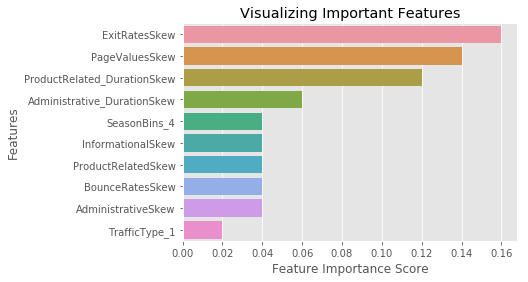

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [18]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Pick the top features
# Split dataset into features and labels
# Features:
fs_X= adadata[['ExitRatesSkew','PageValuesSkew','ProductRelated_DurationSkew',
            'Administrative_DurationSkew','SeasonBins_4','InformationalSkew',
            'ProductRelatedSkew','BounceRatesSkew','AdministrativeSkew',
            'TrafficType_1']]   
# Labels:
fs_y=adadata['RevenueEnc']    

# Split dataset into training set and test set
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(fs_X, fs_y, test_size=0.30, random_state=200) # 70% training and 30% test

In [19]:
ada=AdaBoostClassifier(random_state=500)
# fit the model with data
ada.fit(X_train_fs,y_train_fs)
# predict the model
y_pred_fs=ada.predict(X_test_fs)

In [20]:
print("F1_Score:",metrics.f1_score(y_test_fs, y_pred_fs))
print("AUC:",metrics.roc_auc_score(y_test_fs, y_pred_fs))
print(classification_report(y_test_fs, y_pred_fs))

F1_Score: 0.6115859449192782
AUC: 0.755705399403081
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3126
           1       0.67      0.56      0.61       573

    accuracy                           0.89      3699
   macro avg       0.80      0.76      0.77      3699
weighted avg       0.88      0.89      0.89      3699



## __SMOTE Feature Selection__

In [21]:
sm = SMOTE(random_state = 123) 
X_train_smote_fs, y_train_smote_fs = sm.fit_sample(X_train_fs, y_train_fs) 

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [22]:
ada=AdaBoostClassifier(random_state=500)
# fit the model with data
ada.fit(X_train_smote_fs,y_train_smote_fs)
# predict the model
y_pred_smote_fs=ada.predict(X_test_fs)

In [23]:
cnf_matrix = metrics.confusion_matrix(y_test_fs, y_pred_smote_fs)
cnf_matrix

array([[2800,  326],
       [ 136,  437]])

In [24]:
print("F1_Score:",metrics.f1_score(y_test_fs, y_pred_smote_fs))
print("AUC:",metrics.roc_auc_score(y_test_fs, y_pred_smote_fs))
print(classification_report(y_test_fs, y_pred_smote_fs))

F1_Score: 0.6541916167664671
AUC: 0.8291830383910657
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3126
           1       0.57      0.76      0.65       573

    accuracy                           0.88      3699
   macro avg       0.76      0.83      0.79      3699
weighted avg       0.89      0.88      0.88      3699

